In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('../')

In [4]:
from SHDataset import SHDataset
from utils.utils import *
from models.rulebased import RulebasedDetector
from models.histogram import HistogramDetector

In [3]:
dataset = SHDataset()
G1,T1,G2,T2 = dataset.read_snapshots(0)

In [12]:
dataset = SHDataset(resample_timedp=True, resample_everyn=16)
_,T1_,_,T2_ = dataset.read_snapshots(0)

In [15]:
def highlight_map(path):
    G_diff = compare_snapshots(G1,G2)[1]
    removed_edges = [(edge[0], edge[1]) for edge in G_diff.edges(data=True) if edge[2]['color'] == 'magenta']

    
    mismatched_edges = []
    remaining_path = []
    for edge in path:
        if edge in removed_edges:
            mismatched_edges.append(edge)
        else:
            remaining_path.append(edge)

    # Color the path green, with mismatched removed edges colored as orange
    path_remaining_colors = {edge: 'green' for edge in remaining_path}
    path_removed_colors =  {edge: 'orange' for edge in mismatched_edges}
    nx.set_edge_attributes(G_diff, path_remaining_colors, name='color')
    nx.set_edge_attributes(G_diff, path_removed_colors, name='color')
    
    return G_diff

In [17]:
t_idx = 0
t_ = T2_['T'][t_idx]
rule_det = RulebasedDetector(G1)
path = rule_det.map_match_trajectory(t_)

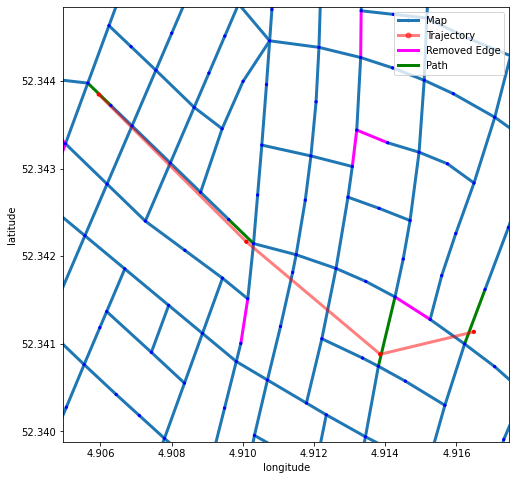

In [37]:
G_path = highlight_map(path)
plot_graph(snapshot_to_nxgraph(G_path, [t_]), zoom_on_traj=True, show_nodes=True, removed_road_edge_width=3, T_edge_width=3,
          T_node_size=10, traj_alpha=.5, G_edge_width=3, savename=os.path.join('./figures', 'rulebased_match_lowtempsparsity'), show_img=False)

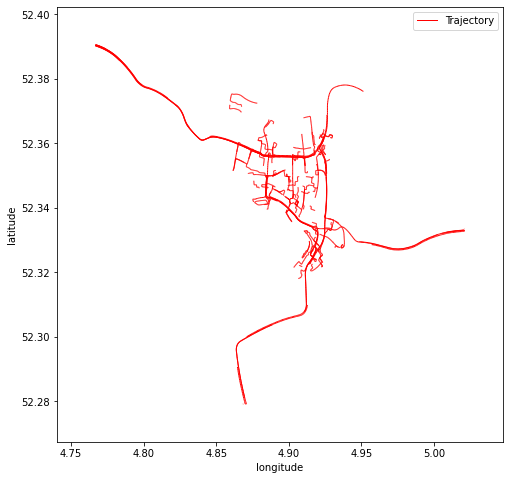

In [8]:
plot_graph(traj_to_nxgraph(T1['T'][:100]))